# Notebook Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
# generate random variables
X = np.random.rand(50, 2)
Y = 2 + np.random.rand(50, 2)

# gather random variable in a dataframe 
Z = np.concatenate((X, Y))
df1 = pd.DataFrame(Z, columns=['xpt', 'ypt'])

In [51]:
df1.head()

,xpt,ypt
0,0.844112,0.677650
1,0.139450,0.658941
2,0.780536,0.538083
3,0.845229,0.385206
4,0.338005,0.996584


In [52]:
# clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(Z)

# extract centoids of clusters into a dataframe
centers = kmeans.cluster_centers_
print(centers)
centroids = pd.DataFrame(centers, columns=['xpt', 'ypt'])

# extract cluster labels
lab = kmeans.labels_

# add cluster information to the dataframe
df1['lab'] = lab

centroids

[[0.49842921 0.54028753]
 [2.55919933 2.48926264]]


,xpt,ypt
0,0.498429,0.540288
1,2.559199,2.489263


In [53]:
df1.head()

,xpt,ypt,lab
0,0.844112,0.677650,0
1,0.139450,0.658941,0
2,0.780536,0.538083,0
3,0.845229,0.385206,0
4,0.338005,0.996584,0


In [54]:
# calculate the radius around each cluster centroid, which includes the data points that were predicted to belong to this cluster.
radii = [cdist(df1[lab == i].iloc[:, [0,1]], [center]).max() for i, center in enumerate(centers)]
radii

[0.6467875736180859, 0.566299900155762]

# Visualization

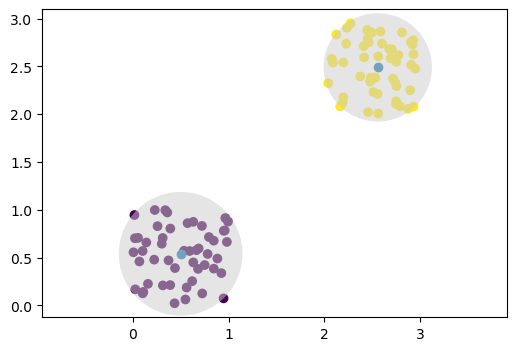

In [55]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(6,4))
 
# add data points
ax.scatter(x=df1['xpt'], y=df1['ypt'], c=df1['lab'])
 
# add cluster centroids
ax.scatter(centroids['xpt'], centroids['ypt'])
 
# set the axis scale on both axes equally
ax.axis('equal')
 
# draw a circle around each cluster centroid
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5))    

# show the plot                       
plt.show()